# Ejercicios Graphs, Paths & Components

Ejercicios básicos de Grafos.

## Ejercicio - Número de Nodos y Enlaces

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Cuente el número de nodos y enlaces con los siguientes links (asumiendo que el grafo puede ser dirigido Y no dirigido): 

In [1]:
edges = set([(1, 2), (3, 1), (3, 2), (2, 4)])

In [2]:
edges = set([(1, 2), (3, 1), (3, 2), (2, 4)])
edges_list = [i[0] for i in edges] + [i[1] for i in edges]
nodes = set(edges_list)

edges_number = len(edges)
nodes_number = len(nodes)

print ("Número de nodos: " + str(nodes_number))
print ("Número de enlaces: " + str(edges_number))

"""Now using NetorkX"""
import networkx as nx

G = nx.Graph()
G.add_edges_from(edges)

print ("Número de nodos: " + str(G.number_of_nodes()))
print ("Número de aristas: " + str(G.number_of_edges()))

Número de nodos: 4
Número de enlaces: 4
Número de nodos: 4
Número de aristas: 4


## Ejercicio - Matriz de Adyacencia

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _


Cree la matriz de adyacencia del grafo del ejercicio anterior (para dirigido y no-dirigido)

In [6]:
"""Código propio"""
import numpy as np

edges = set([(1,2), (3, 1), (3, 2), (2, 4)])

def adj_matrix_dgraph(edges):
    edges_list = [i[0] for i in edges] + [i[1] for i in edges]
    nodes = set(edges_list)
    
    """create matrix"""
    matrix = np.zeros((len(nodes),len(nodes)))
    
    for edge in edges:
        matrix[edge[0] - 1,edge[1] -1] = 1
    
    return matrix

def adj_matrix(edges):
    edges_list = [i[0] for i in edges] + [i[1] for i in edges]
    nodes = set(edges_list)
    
    """create matrix"""
    matrix = np.zeros((len(nodes),len(nodes)))
    
    for edge in edges:
        i = edge[0]-1
        j = edge[1]-1
        matrix[i,j] = 1
        matrix[j,i] = 1
    
    return matrix

print ("matriz para grafo dirigido:\n" + str(adj_matrix_dgraph(edges)))
print ("\n")
print ("matriz para grafo no dirigido:\n" + str(adj_matrix(edges)))

"""Solución con NetworkX"""

import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

matrix = nx.adjacency_matrix(G)

print (matrix)

DG = nx.DiGraph()
DG.add_edges_from(edges)

print ("\n")
print (nx.adjacency_matrix(DG))

matriz para grafo dirigido:
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  1.  0.  0.]
 [ 0.  0.  0.  0.]]


matriz para grafo no dirigido:
[[ 0.  1.  1.  0.]
 [ 1.  0.  1.  1.]
 [ 1.  1.  0.  0.]
 [ 0.  1.  0.  0.]]
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


  (0, 1)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1


D## Ejercicio - Sparseness

Calcule la proporción entre número de links existentes en 3 redes reales (http://snap.stanford.edu/data/index.html) contra el número de links posibles.

In [23]:
import numpy as np

""" The entered datasets correspond to non-directed graphs"""
""" information about the dataset can be found in the following link:
    http://snap.stanford.edu/data/egonets-Facebook.html """

edges1 = np.genfromtxt('0.edges', dtype="int", delimiter=" ")

edges2 = np.genfromtxt('348.edges', dtype="int", delimiter=" ")

edges3 = np.genfromtxt('414.edges', dtype="int", delimiter=" ")

def edges_to_nodes(edges):
    edges_list = [i[0] for i in edges] + [i[1] for i in edges]
    nodes = set(edges_list)
    
    return nodes


def edge_rate(edges):
    nodes = edges_to_nodes(edges)
    n = len(nodes)
    
    print ("len(n) = %d" %(n))
    
    """ For a non-directed graph and excluding reflexive relations"""
    possible_edges = (n*(n-1))/2
    
    print ("possible_edges=%d" % (possible_edges))
    result = float(len(edges))/possible_edges
    return result

def edge_rate_dgraph(edges):
    nodes = edges_to_nodes(edges)
    n = len(nodes)
    
    """ For a directed graph including reflexive relations"""
    possible_edges = n**2
    result = float(len(edges))/possible_edges
    return result

print (edge_rate(edges1))
print (edge_rate(edges2))
print (edge_rate(edges3))

""" With networkx """

import networkx as nx

G1 = nx.read_edgelist('0.edges', delimiter=" ")
G2 = nx.read_edgelist('348.edges', delimiter=" ")
G3 = nx.read_edgelist('414.edges', delimiter=" ")


def possible_edges(graph):
    nodes = graph.number_of_nodes()
    return (nodes*(nodes-1))/2

print ("possible_edges(G1)=%d" % (possible_edges(G1)))

def edge_rate_nx(graph):
    return float(graph.number_of_edges())/float(possible_edges(graph))

print ("\n")
print (edge_rate_nx(G1))
print (edge_rate_nx(G2))
print (edge_rate_nx(G3))

len(n) = 333
possible_edges=55278
0.09113933210318753
len(n) = 224
possible_edges=24976
0.2556053811659193
len(n) = 150
possible_edges=11175
0.3029977628635347
possible_edges(G1)=55278


0.045569666051593766
0.12780269058295965
0.15149888143176735


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [5]:
""" Without NetworkX """
import numpy as np

def edges_to_nodes(edges):
    edges_list = [i[0] for i in edges] + [i[1] for i in edges]
    nodes = set(edges_list)
    print ("len(nodes)=%d" %(len(nodes)))
    return nodes

""" The entered datasets correspond to non-directed graphs"""
""" information about the dataset can be found in the following link:
    http://snap.stanford.edu/data/egonets-Facebook.html """

edges1 = np.genfromtxt('0.edges', dtype="int", delimiter=" ")
print (len(edges1))

edges2 = np.genfromtxt('348.edges', dtype="int", delimiter=" ")
print (len(edges2))

edges3 = np.genfromtxt('414.edges', dtype="int", delimiter=" ")
print (len(edges3))

""" Asuming there aren't repeated elements in the dataset """

def number_of_zeroes(edges):
    n = len(edges_to_nodes(edges))
    zeroes = n**2 - len(edges)
    return zeroes

def number_of_zeroes_dgraph(edges):
    n = len(edges_to_nodes(edges))
    zeroes = n**2 - len(edges)
    return zeroes


print ("number_of_zeroes(edges1)=%d" %(number_of_zeroes(edges1)))
print ("number_of_zeroes(edges2)=%d" %(number_of_zeroes(edges2)))
print ("number_of_zeroes(edges3)=%d" %(number_of_zeroes(edges3)))


5038
6384
3386
len(nodes)=333
number_of_zeroes(edges1)=105851
len(nodes)=224
number_of_zeroes(edges2)=43792
len(nodes)=150
number_of_zeroes(edges3)=19114


In [6]:
""" With NetworkX """
import networkx as nx

""" The selected datasets are non-directed graphs. Therefore their adjacency matrix is simetrical """

""" For undirected graphs NetworkX stores only the edges of one of the matrix's triangles (upper or lower)"""

G1 = nx.read_edgelist('0.edges', delimiter=" ")
print (len(G1.edges()))

G2 = nx.read_edgelist('348.edges', delimiter=" ")
print (len(G2.edges()))

G3 = nx.read_edgelist('414.edges', delimiter=" ")
print (len(G3.edges()))

N1 = len(G1.nodes())
N2 = len(G2.nodes())
N3 = len(G3.nodes())

def zeroes(graph):
    N = len(graph.nodes())
    result = N**2 - 2*len(graph.edges())
    print ("zeroes=%d" %(result))
    return result

zeroes(G1)
zeroes(G2)
zeroes(G3)



2519
3192
1693
zeroes=105851
zeroes=43792
zeroes=19114


19114

## Ejercicio - Redes Bipartitas

Defina una red bipartita y genere ambas proyecciones, explique qué son los nodos y links tanto de la red original como de las proyeccciones

In [7]:
import numpy as np

network1 = set([(1,'a'),(3,'b'), (4,'d'),(5,'b'),(1,'b'), (2,'d'), (1,'d'), (3,'c')])

def projection_u(edges):
    edges_list = list(edges)
    result = []
    for i in range(0,len(edges_list)):
        for j in range(i+1, len(edges_list)):
            if edges_list[i][1] == edges_list[j][1]:
                tup = (edges_list[i][0], edges_list[j][0])
                result.append(tup)
    
    return set(result)

print (projection_u(network1))

def projection_v(edges):
    edges_list = list(edges)
    result = []
    for i in range(0,len(edges_list)):
        for j in range(i+1, len(edges_list)):
            if edges_list[i][0] == edges_list[j][0]:
                tup = (edges_list[i][1], edges_list[j][1])
                result.append(tup)
    
    return set(result)

print (projection_v(network1))

{(1, 2), (3, 1), (1, 4), (5, 1), (2, 4), (3, 5)}
{('a', 'b'), ('d', 'b'), ('b', 'c'), ('d', 'a')}


In [8]:
""" With NetworkX """
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

edges = set([(1,'a'),(3,'b'), (4,'d'),(5,'b'),(1,'b'), (2,'d'), (1,'d'), (3,'c')])
B = nx.Graph()
B.add_nodes_from([1,2,3,4,5], bipartite=0)
B.add_nodes_from(['a','b','c','d'], bipartite=1)
B.add_edges_from(edges)

projection_u = bipartite.projected_graph(B, [1,2,3,4,5])
print (projection_u.edges())

projection_v = bipartite.projected_graph(B, ['a','b','c','d'])
print (projection_v.edges())

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 4), (3, 5)]
[('a', 'd'), ('a', 'b'), ('b', 'd'), ('b', 'c')]


## Explicación
Los nodos de la red original corresponden a elementos pertenecientes a dos conjuntos U y V. Para este caso particular los conjuntos son disjuntos y tienen tipos diferentes de datos. los links de la red original representan relaciones entre ambos conjuntos.

En la red de proyecciones de U, los nodos representan elementos de un mismo conjunto y los enlaces representan relaciones entre elementos del mismo conjunto definidas a partir de elementos comunes del conjunto V con el cual un par de elementos x,y del conjunto U se relacionan. i.e. si 'x' y 'y', pertenecientes al conjunto, U se relacionan con un elemento 'w', perteneciente al conjunto V, entonces 'x' se relaciona con 'y', i.e. hay un link entre 'x' y 'y'.

Para el caso de las proyecciones de V, la definición varía en que si un par de elementos 'x','y' pertenecientes al conjunto V se relacionan, i.e. hay un link entre ellos, entonces 'x' y 'y' se relacionan en la proyección de V.

## Ejercicio - Paths

Cree un grafo de 5 nodos con 5 enlaces. Elija dos nodos cualquiera e imprima:
+ 5 Paths diferentes entre los nodos
+ El camino mas corto entre los nodos
+ El diámetro de la red
+ Un self-avoiding path


In [9]:
import numpy as np

edges = set([(1,4),(2,3),(2,4),(2,5),(3,4),(4,1),(3,2),(4,2),(5,2),(4,3)])

graph = {1:[4],
         2:[3,4,5],
         3:[2,4],
         4:[3,2],
         5:[2]}

print (edges)
""" From 1 to 5 """
path1 = [1,4,3,2,5]
path2 = [1,4,2,5]
path3 = [1,4,2,3,2,5]
path4 = [1,4,3,4,2,5]
path5 = [1,4,2,4,2,5]

print(path1)
print(path2)
print(path3)
print(path4)
print(path5)

""" Shortest path"""
def find_shortest_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if not start in graph:
        return None
    shortest = None
    for node in graph[start]:
        if node not in path:
            newpath = find_shortest_path(graph, node, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest
print ("Shortest path is: %s" %(str(find_shortest_path(graph,1,5))))

{(4, 1), (3, 2), (5, 2), (1, 4), (2, 3), (4, 3), (4, 2), (2, 5), (3, 4), (2, 4)}
[1, 4, 3, 2, 5]
[1, 4, 2, 5]
[1, 4, 2, 3, 2, 5]
[1, 4, 3, 4, 2, 5]
[1, 4, 2, 4, 2, 5]
Shortest path is: [1, 4, 2, 5]


In [10]:
import numpy as np
import networkx as nx

edges = set([(1,4),(2,3),(2,4),(2,5),(3,4),(4,1),(3,2),(4,2),(5,2),(4,3)])

G = nx.Graph()
G.add_edges_from(edges)

for path in nx.all_simple_paths(G, source=1,target=5):
    print (path)
    
print ("Shortest path is: %s" %(str(nx.shortest_path(G,source=1,target=5))))

[1, 4, 3, 2, 5]
[1, 4, 2, 5]
Shortest path is: [1, 4, 2, 5]


# Ejercicio - Componentes

Baje una red real (http://snap.stanford.edu/data/index.html) y lea el archivo 

In [11]:
import numpy as np

""" The entered datasets correspond to non-directed graphs"""
""" information about the dataset can be found in the following link:
    http://snap.stanford.edu/data/egonets-Facebook.html """

edges1 = np.genfromtxt('0.edges', dtype="int", delimiter=" ")

In [12]:
""" With NetworkX """
import numpy as np
import networkx as nx

G1 = nx.read_edgelist('0.edges', delimiter=" ")

Utilizando NetworkX o iGraph descubra el número de componentes

In [13]:
import numpy as np
import networkx as nx

G = nx.read_edgelist('0.edges', delimiter=" ")

print ("number_connected_components=%d" %(nx.number_connected_components(G)))

number_connected_components=5


Implemente el algorithmo Breadth First para encontrar el número de componentes (revise que el resultado es el mismo que utilizando la librería)

In [14]:
import numpy as np
import collections
from IPython.core.debugger import Tracer

""" The entered datasets correspond to non-directed graphs"""
""" information about the dataset can be found in the following link:
    http://snap.stanford.edu/data/egonets-Facebook.html """

edges1 = np.genfromtxt('0.edges', dtype="int", delimiter= " ")

edges2 = set([(1,2),(2,3),(2,4),(3,4),(4,5),(4,6),(7,)])


e = list(edges2)

print ("Tuple 5 is:" + str(e[4][0]))
print ("Tuple 5 is:" + str(e[4][0]))

""" This method is for undirected graphs """

def edges_to_graph(edges):
    edges = list(edges)
    graph = {}
    
    for i in range(0,len(edges)):
        
        if graph.get(edges[i][0], None):
            graph[edges[i][0]].add(edges[i][1])
        else:
            if len(edges[i]) == 2:
                graph[edges[i][0]] = set([edges[i][1]])
            else:
                graph[edges[i][0]] = set([])
        
        if len(edges[i]) == 2:
            if graph.get(edges[i][1], None):
                graph[edges[i][1]].add(edges[i][0])
            else:
                graph[edges[i][1]] = set([edges[i][0]])

    return graph

graph1 = edges_to_graph(edges1)
graph2 = edges_to_graph(edges2)
print (str(edges_to_graph(edges2)))

""" The following code snippet was taken from Mann, Edd. Depth-First Search and Breadth-First Search in Python.
    http://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/ """

def bfs(graph, start):
    visited, queue = set(), collections.deque([start])
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

def number_connected_components(graph):
    Tracer()
    nodes = set(graph.keys())
    num = 0
    while len(nodes):
        root = next(iter(nodes))
        visited = bfs(graph, root)
        nodes = nodes - visited
        num += 1
        
    return num

print (str(number_connected_components(graph2)))

print (str(number_connected_components(graph1)))

Tuple 5 is:7
Tuple 5 is:7
{1: {2}, 2: {1, 3, 4}, 4: {2, 3, 5, 6}, 6: {4}, 5: {4}, 3: {2, 4}, 7: set()}
2
5


## Ejercicio - Degree distribution

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Haga un plot con la distribución de grados de la red real

{'236': 36, '186': 43, '122': 62, '285': 46, '24': 15, '346': 26, '271': 72, '304': 54, '176': 13, '9': 56, '130': 15, '329': 29, '204': 21, '213': 38, '252': 64, '332': 42, '82': 33, '65': 11, '276': 17, '26': 67, '280': 42, '272': 44, '211': 29, '199': 46, '84': 12, '133': 17, '62': 25, '239': 58, '172': 40, '322': 71, '53': 30, '3': 16, '170': 45, '175': 16, '46': 4, '56': 77, '254': 16, '194': 18, '231': 20, '117': 5, '127': 15, '135': 9, '103': 15, '188': 47, '23': 16, '116': 16, '73': 9, '299': 19, '288': 3, '315': 55, '119': 61, '323': 38, '48': 21, '57': 14, '200': 56, '98': 48, '313': 36, '63': 5, '344': 8, '67': 75, '118': 35, '325': 38, '277': 64, '134': 18, '270': 3, '76': 2, '36': 10, '223': 26, '274': 13, '88': 19, '21': 64, '339': 26, '108': 12, '197': 15, '169': 37, '275': 9, '273': 8, '83': 6, '28': 12, '312': 25, '242': 23, '214': 16, '20': 14, '307': 3, '71': 2, '333': 7, '207': 2, '168': 10, '308': 23, '341': 11, '128': 27, '334': 27, '238': 22, '265': 26, '141': 27

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


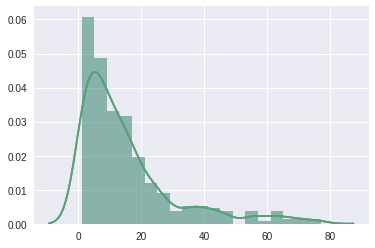

In [18]:
import numpy as np
import networkx as nx
import seaborn as sns

%matplotlib inline

edges1 = np.genfromtxt('0.edges', dtype="int", delimiter=" ")

graph1 = edges_to_graph(edges1)

def degrees(graph):
    degrees = {}
    for node, links in graph.items():
        degrees[node] = len(links)
    return degrees

d = degrees(graph1)

ax = sns.distplot(list(d.values()))

""" With NetworkX """
G = nx.read_edgelist('0.edges', delimiter=" ")

print (G.degree())

bx = sns.distplot(list(G.degree().values()))

Calcule el grado promedio

In [21]:
""" Without NetworkX """

k_mean = sum(d.values())/len(d)

print (k_mean)

""" With NetworkX """
d_nx = G.degree()
k_mean_nx = sum(d_nx.values())/len(d_nx)
print (k_mean)

15.12912912912913
15.12912912912913


## Ejercicio - Diámetro

In [7]:
N = 5

Cree un grafo de N nodos con el máximo diámetro posible

Cree un grafo de N nodos con el mínimo diámetro posible

Cree un grafo de N nodos que sea un ciclo simple

## Ejercicio - Pregunta "real"

Una aerolínea tiene las siguientes rutas desde las ciudades a las que sirve (cada par tiene servicio en ambas direcciones).

In [8]:
routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]

Cuál es el máximo número de intercambios que tendría que hacer un pasajero en un solo viaje entre dos ciudades servidas? (suponiendo rutas óptimas)

In [40]:
import numpy as np

routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]


def edges_to_graph(edges):
    edges = list(edges)
    graph = {}
    
    for i in range(0,len(edges)):
        
        if graph.get(edges[i][0], None):
            graph[edges[i][0]].add(edges[i][1])
        else:
            if len(edges[i]) == 2:
                graph[edges[i][0]] = set([edges[i][1]])
            else:
                graph[edges[i][0]] = set([])
        
        if len(edges[i]) == 2:
            if graph.get(edges[i][1], None):
                graph[edges[i][1]].add(edges[i][0])
            else:
                graph[edges[i][1]] = set([edges[i][0]])

    return graph


""" This function was taken from Python Software Foundation.
    Python Patterns - Implementing Graphs. https://www.python.org/doc/essays/graphs/ 
    (Visited in march 2017) """
def find_shortest_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if not start in graph:
        return None
    shortest = None
    for next in graph[start]:
        if next not in path:
            newpath = find_shortest_path(graph, next, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

graph1 = edges_to_graph(routemap)

def adjacency_matrix(graph):
    keys = list(graph.keys())
    keys.sort()
    
    adj_matrix = np.zeros((len(keys),len(keys)))
    
    for node, edges in graph.items():
        for edge in edges:
            adj_matrix[keys.index(node)][keys.index(edge)] = 1
    
    return (adj_matrix, keys)
            

adj_matrix = adjacency_matrix(graph1)

def distance_matrix(graph):
    keys = list(graph.keys())
    keys.sort()
    
    d_matrix = np.zeros((len(keys),len(keys)))
    
    for i in range(0, len(keys)):
        for j in range(0, len(keys)):
            start = keys[i]
            end = keys[j]
            path = find_shortest_path(graph, start, end)
            d_matrix[i][j] = len(path)-1
    
    return (d_matrix, keys)


def max_distance(graph):
    result = distance_matrix(graph)
    keys = result[1]
    d_matrix = result[0]
    
    result = 0
    result_i = -1
    result_j = -1
    for i in range(0, len(keys)):
        for j in range(0, len(keys)):
            if d_matrix[i][j] >= result:
                result = d_matrix[i][j]
                result_i = i
                result_j = j
    
    start = keys[result_i]
    end = keys[result_j]
    
    return (start, end, result)

print (distance_matrix(graph1)[0])
print (max_distance(graph1))

[[ 0.  1.  2.  4.  2.  1.  3.  5.  3.  4.  3.  2.  2.  4.  3.  3.  4.  4.
   2.]
 [ 1.  0.  1.  3.  3.  2.  3.  4.  2.  3.  3.  1.  3.  3.  2.  3.  3.  3.
   3.]
 [ 2.  1.  0.  2.  3.  3.  3.  3.  3.  2.  3.  2.  4.  2.  1.  2.  2.  2.
   4.]
 [ 4.  3.  2.  0.  3.  3.  3.  1.  2.  2.  1.  3.  4.  2.  1.  2.  2.  1.
   2.]
 [ 2.  3.  3.  3.  0.  1.  1.  3.  2.  2.  3.  3.  1.  2.  2.  1.  2.  3.
   2.]
 [ 1.  2.  3.  3.  1.  0.  2.  4.  3.  3.  2.  3.  1.  3.  3.  2.  3.  4.
   1.]
 [ 3.  3.  3.  3.  1.  2.  0.  4.  1.  1.  2.  2.  1.  2.  2.  2.  3.  2.
   3.]
 [ 5.  4.  3.  1.  3.  4.  4.  0.  3.  3.  2.  4.  4.  2.  2.  2.  1.  2.
   3.]
 [ 3.  2.  3.  2.  2.  3.  1.  3.  0.  2.  1.  1.  2.  3.  2.  3.  3.  1.
   2.]
 [ 4.  3.  2.  2.  2.  3.  1.  3.  2.  0.  3.  3.  2.  1.  1.  2.  2.  2.
   4.]
 [ 3.  3.  3.  1.  3.  2.  2.  2.  1.  3.  0.  2.  3.  3.  2.  3.  3.  2.
   1.]
 [ 2.  1.  2.  3.  3.  3.  2.  4.  1.  3.  2.  0.  3.  4.  3.  4.  4.  2.
   3.]
 [ 2.  3.  4.  4.  1.  1.  1

Si usted necesitara viajar mucho en esta aerolínea, cual sería el lugar óptimo para vivir? (i.e. minimizar el número de intercambios para llegar a cualquier ciudad) 

In [38]:
""" The for optimal place to live I understand the city with the least number of leaps """

def optimal_place(graph):
    result = distance_matrix(graph)
    keys = result[1]
    d_matrix = result[0]
    
    total_leaps = 3000000000
    result_i = -1
    
    for i in range(0, len(keys)):
        current_sum = sum(d_matrix[i])
        if current_sum < total_leaps:
            total_leaps = current_sum
            result_i = i
            
    city = keys[result_i]
    vector = d_matrix[result_i]
    
    return (city, total_leaps, vector)

print (optimal_place(graph1))


('San Diego', 34.0, array([ 3.,  2.,  1.,  1.,  2.,  3.,  2.,  2.,  2.,  1.,  2.,  3.,  3.,
        1.,  0.,  1.,  1.,  1.,  3.]))


Visualice la red

In [7]:
import numpy as np
import networkx as nx


routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]

G = nx.Graph()
G.add_edges_from(routemap)

nx.draw(G)

/home/sangeea/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sangeea/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sangeea/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sangeea/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

